THE ISING MODEL

Needed libraries :



In [38]:
%matplotlib inline
import numpy
from matplotlib import pyplot
import matplotlib.cm as cm
from matplotlib import animation
from IPython.display import HTML

A) Challenge : checking that the metropolis algorithm gives the correct ratio of "ups" and "downs" for different lattice configurations.

In [39]:
def initial_state(nx,ny):
    # Uniform random spins between 0 and 1
    r = numpy.random.randint(0,2,(nx,ny))
    # Where r=0, we assign a negative spin
    r[r==0] =-1

    return r

In [40]:
nx = 10
ny = 10
alpha = 0.1
sp=initial_state(10,10)

Contribution to the energy for a given spin at location (ix,iy) for a lattice with periodic boundary conditions :

In [41]:
def energy_at_site(sp,alpha,sigma,ix,iy):
    # sp : array of spins
    # alpha coupling constant J/kb*T
    # sigma spin at location (ix,iy)

    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy

Flipping a dipole at location (ix,iy) if p < exp(-dE), p random number, 
                                                       dE energy difference between flipped and unflipped dipole (Metropolis probability)

In [43]:
def metropolis_at_site(sp,alpha,ix,iy):

    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)

    if (numpy.random.random_sample()<numpy.exp(-(energy_if_site_flipped-energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

In [44]:
NMC = 100000
states = numpy.empty(NMC+1)
states[0]=sp[5,5]

for n in range(0,NMC):
    metropolis_at_site(sp,alpha,5,5)
    states[n]=sp[5,5]

ups = numpy.extract(states==1, states).size
downs = NMC - ups
print(ups/downs)

1


B) Ising model : 1. Initial state : all spins pointing upwards.

In [45]:
nx = 100
ny = 100
sp = numpy.ones([nx,ny])

 Creating a sequence of states : 

In [46]:
def ising_model_metropolis(sp, NMC, nx, ny, alpha):
    # NMC : Number of states to create
    
    states = numpy.empty([NMC+1,nx,ny])
    states[0] = sp.copy()
    
    for i in range(1,NMC+1):
        for j in range(0,nx*ny):
            ix=numpy.random.randint(0,nx)
            iy=numpy.random.randint(0,ny)
            metropolis_at_site(sp,alpha,ix,iy)
        states[i]=sp.copy()
        
    return states


Generating sequences of 100 states for different values of alpha :

In [49]:
NMC=100
alpha=0.2
states_0_2 = ising_model_metropolis(sp, NMC, nx, ny, alpha)


Function for the computation of the average energy for each alpha

In [106]:
def average_energy(NMC,alpha,state):
    E_tot=0
    for i in range(NMC):
        for j in range(nx):
            for k in range(ny):
                E_tot=E_tot+energy_at_site(state[i],alpha,state[i,j,k],j,k)
    return E_tot/NMC

In [109]:
def average_magnetization(NMC,alpha,state):
    M_tot=0
    for i in range(NMC):
        for j in range(nx):
            for k in range(ny):
                M_tot=M_tot+state[i,j,k]
    return M_tot/NMC
                

In [110]:
av_energy_0_2=average_energy(NMC,alpha,states_0_2)
av_magn_0_2=average_magnetization(NMC,alpha,states_0_2

In [111]:
NMC=100
sp = numpy.ones([nx,ny]) # re-initialization 
alpha=0.3
states_0_3 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [112]:
av_energy_0_3=average_energy(NMC,alpha,states_0_3)
av_magn_0_3=average_magnetization(NMC,alpha,states_0_3)

In [113]:
NMC=100
sp = numpy.ones([nx,ny])
alpha=0.35
states_0_35 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [114]:
av_energy_0_35=average_energy(NMC,alpha,states_0_35)
av_magn_0_35=average_magnetization(NMC,alpha,states_0_35)

In [115]:
NMC=100
sp = numpy.ones([nx,ny])
alpha=0.4
states_0_4 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [116]:
av_energy_0_4=average_energy(NMC,alpha,states_0_4)
av_magn_0_4=average_magnetization(NMC,alpha,states_0_4)

In [117]:
NMC=100
sp = numpy.ones([nx,ny])
alpha=0.45
states_0_45 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [118]:
av_energy_0_45=average_energy(NMC,alpha,states_0_45)
av_magn_0_45=average_magnetization(NMC,alpha,states_0_45)

In [119]:
NMC=100
sp = numpy.ones([nx,ny])
alpha=0.5
states_0_5 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [120]:
av_energy_0_5=average_energy(NMC,alpha,states_0_5)
av_magn_0_5=average_magnetization(NMC,alpha,states_0_5)

In [121]:
NMC=100
sp = numpy.ones([nx,ny])
alpha=0.6
states_0_6 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [122]:
av_energy_0_6=average_energy(NMC,alpha,states_0_6)
av_magn_0_6=average_magnetization(NMC,alpha,states_0_6)

In [123]:
NMC=100
sp = numpy.ones([nx,ny])
alpha=0.7
states_0_7 = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [124]:
av_energy_0_7=average_energy(NMC,alpha,states_0_7)
av_magn_0_7=average_magnetization(NMC,alpha,states_0_7)

Plotting the evolution of the total spin (magnetisation) as the sequence is generated as a function of alpha :

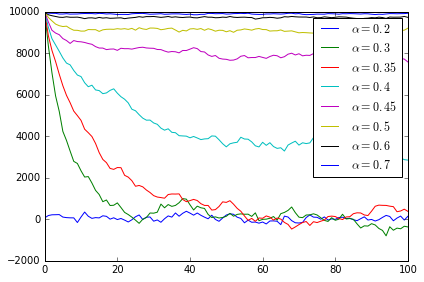

In [79]:
pyplot.figure()
pyplot.plot(states_0_2.sum(axis=(1,2)),label=r'$\alpha=0.2$')
pyplot.plot(states_0_3.sum(axis=(1,2)),label=r'$\alpha=0.3$')
pyplot.plot(states_0_35.sum(axis=(1,2)),label=r'$\alpha=0.35$')
pyplot.plot(states_0_4.sum(axis=(1,2)),label=r'$\alpha=0.4$')
pyplot.plot(states_0_45.sum(axis=(1,2)),label=r'$\alpha=0.45$')
pyplot.plot(states_0_5.sum(axis=(1,2)),label=r'$\alpha=0.5$')
pyplot.plot(states_0_6.sum(axis=(1,2)),label=r'$\alpha=0.6$')
pyplot.plot(states_0_7.sum(axis=(1,2)),label=r'$\alpha=0.7$')
pyplot.legend()
pyplot.tight_layout()

ValueError: 'axis' entry is out of bounds

(2) Initial state :  all spins pointing upwards on the borders and randomly oriented in the bulk :

In [86]:
nx=100
ny=100
sp = initial_state(nx,ny)
sp[0,:]=sp[99,:]=sp[:,0]=sp[:,99]=1

In [101]:
NMC=100
alpha=0.2
states_0_2_a = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [132]:
av_energy_0_2_a=average_energy(NMC,alpha,states_0_2_a)
av_magn_0_2_a=average_magnetization(NMC,alpha,states_0_2_a)

In [99]:
NMC=100
sp = initial_state(nx,ny)
sp[0,:]=sp[99,:]=sp[:,0]=sp[:,99]=1
alpha=0.3
states_0_3_a = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [131]:
av_energy_0_3_a=average_energy(NMC,alpha,states_0_3_a)
av_magn_0_3_a=average_magnetization(NMC,alpha,states_0_3_a)

In [97]:
NMC=100
sp = initial_state(nx,ny)
sp[0,:]=sp[99,:]=sp[:,0]=sp[:,99]=1
alpha=0.35
states_0_35_a = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [130]:
av_energy_0_35_a=average_energy(NMC,alpha,states_0_35_a)
av_magn_0_35_a=average_magnetization(NMC,alpha,states_0_35_a)

In [95]:
NMC=100
sp = initial_state(nx,ny)
sp[0,:]=sp[99,:]=sp[:,0]=sp[:,99]=1
alpha=0.4
states_0_4_a = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [129]:
av_energy_0_4_a=average_energy(NMC,alpha,states_0_4_a)
av_magn_0_4_a=average_magnetization(NMC,alpha,states_0_4_a)

In [93]:
NMC=100
sp = initial_state(nx,ny)
sp[0,:]=sp[99,:]=sp[:,0]=sp[:,99]=1
alpha=0.5
states_0_5_a = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [128]:
av_energy_0_5_a=average_energy(NMC,alpha,states_0_5_a)
av_magn_0_5_a=average_magnetization(NMC,alpha,states_0_5_a)

In [91]:
NMC=100
sp = initial_state(nx,ny)
sp[0,:]=sp[99,:]=sp[:,0]=sp[:,99]=1
alpha=0.6
states_0_6_a = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [127]:
av_energy_0_6_a=average_energy(NMC,alpha,states_0_6_a)
av_magn_0_6_a=average_magnetization(NMC,alpha,states_0_6_a)

In [89]:
NMC=100
sp = initial_state(nx,ny)
sp[0,:]=sp[99,:]=sp[:,0]=sp[:,99]=1
alpha=0.7
states_0_7_a = ising_model_metropolis(sp, NMC, nx, ny, alpha)

In [126]:
av_energy_0_7_a=average_energy(NMC,alpha,states_0_7_a)
av_magn_0_7_a=average_magnetization(NMC,alpha,states_0_7_a)

Plotting the evolution of the total spin (magnetisation) as the sequence is generated as a function of alpha :

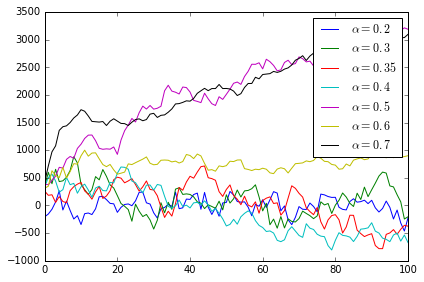

In [133]:
pyplot.figure()
pyplot.plot(states_0_2_a.sum(axis=(1,2)),label=r'$\alpha=0.2$')
pyplot.plot(states_0_3_a.sum(axis=(1,2)),label=r'$\alpha=0.3$')
pyplot.plot(states_0_35_a.sum(axis=(1,2)),label=r'$\alpha=0.35$')
pyplot.plot(states_0_4_a.sum(axis=(1,2)),label=r'$\alpha=0.4$')
pyplot.plot(states_0_5_a.sum(axis=(1,2)),label=r'$\alpha=0.5$')
pyplot.plot(states_0_6_a.sum(axis=(1,2)),label=r'$\alpha=0.6$')
pyplot.plot(states_0_7_a.sum(axis=(1,2)),label=r'$\alpha=0.7$')
pyplot.legend()
pyplot.tight_layout()